# IBM HR Analytics Employee Attrition & Performance

### In this notebook, I will try to predict if an employee whetever the employee is attrition or not

In [38]:
import pandas as pd
import seaborn as sns

### Uploading and showing the data

In [2]:
data = pd.read_csv(r'C:\Users\meirk\Desktop\Ariel\data_sceince\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


My goal is to predict whetever the employee is attrition or not, so lets see how many employees are worn and how many are not worn:

In [12]:
how_many = data['Attrition'].value_counts()
how_many

No     1233
Yes     237
Name: Attrition, dtype: int64

In [30]:
no_precent = (how_many['No'] / len(data)) * 100
yes_precent = (how_many['Yes'] / len(data)) * 100
pd.DataFrame(data = {'No': [no_precent], 'Yes': [yes_precent]})

,No,Yes
0,83.877551,16.122449


As we can see, the majority of the employees, 1233 of them, which are 83.87% are not attrition, and only 237 of them, which are 16.12% are indeed attrition.

,DistanceFromHome
1,208
2,211
3,84
4,64
5,65
6,59
7,84
8,80
9,85
10,86


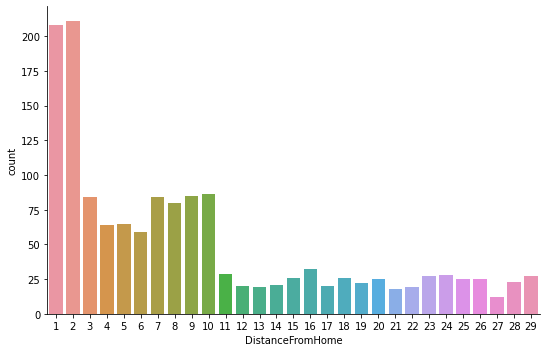

In [87]:
distance_df = pd.DataFrame(data['DistanceFromHome'].value_counts().sort_index(ascending = True))

sns.catplot(data=data,kind='count',height=5,aspect=1.5,x='DistanceFromHome')
distance_df

In [112]:
far_and_attrition = len(data.loc[(data['DistanceFromHome'] == 1) & (data['Attrition'] == 'Yes')])
far_and_attrition
len(data.loc[(data['DistanceFromHome'] == 2) & (data['Attrition'] == 'Yes')])

28

In [123]:
for i in range(1,30):
    sum_ = len(data.loc[(data['DistanceFromHome'] == i) & (data['Attrition'] == 'Yes')])
    print(sum_, "employees are in category: ", i, "and Attriton")

26 employees are in category:  1 and Attriton
28 employees are in category:  2 and Attriton
14 employees are in category:  3 and Attriton
9 employees are in category:  4 and Attriton
10 employees are in category:  5 and Attriton
7 employees are in category:  6 and Attriton
11 employees are in category:  7 and Attriton
10 employees are in category:  8 and Attriton
18 employees are in category:  9 and Attriton
11 employees are in category:  10 and Attriton
4 employees are in category:  11 and Attriton
6 employees are in category:  12 and Attriton
6 employees are in category:  13 and Attriton
4 employees are in category:  14 and Attriton
5 employees are in category:  15 and Attriton
7 employees are in category:  16 and Attriton
5 employees are in category:  17 and Attriton
4 employees are in category:  18 and Attriton
3 employees are in category:  19 and Attriton
4 employees are in category:  20 and Attriton
3 employees are in category:  21 and Attriton
6 employees are in category:  22 an